In [24]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

ModuleNotFoundError: No module named 'tensorflow.python.keras.applications'

In [22]:
from keras.applications import ResNet50
from keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D


In [23]:
model = ResNet50(include_top=False, pooling='avg')


new_model = Sequential()
new_model.add(model)
new_model.add(Dense(1, ))

print(new_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 1)                 2049      
 per)                                                            
                                                                 
Total params: 23589761 (89.99 MB)
Trainable params: 23536641 (89.79 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________
None


In [38]:
DIR = r'/Users/nimis/OneDrive/Desktop/Python_project/DeepLearning/'

In [17]:
import pandas as pd
df = pd.read_csv(DIR + 'ratings.csv')

In [23]:
from collections import defaultdict
import numpy as np
all_images = defaultdict(list)

from collections import defaultdict
import numpy as np


all_images = defaultdict(list)
for filename, rating in df[['movieId', 'rating']].values:
    all_images[filename].append(rating)
data = {}


#for filename, ratings in all_images.iteritems():
for filename, ratings in all_images.items():
    data[filename] = np.mean(ratings)


len(data)

9724

In [31]:
ratings = dict(data)

In [32]:
import os

In [56]:
from keras.preprocessing import image

images = []
ys = []
#Images are added to ratings dict
ratings['1.png']=3
ratings['2.png']=2
ratings['3.png']=4
ratings['4.png']=3
ratings['5.png']=5
for filename in os.listdir(DIR + 'Images'):
    img_path = DIR + '/Images/' + filename
    img=image.load_img(img_path)
    img=image.img_to_array(img)
    images.append(img)
    ys.append(ratings[filename])
    

In [57]:
len(images)

5

In [58]:
len(ys)

5

3


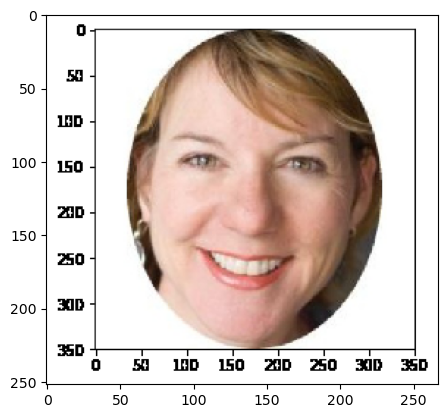

In [88]:
import matplotlib.pyplot as plt
IND = 0
plt.imshow(images[IND]/255.0)
print(ys[IND])
plt.show()

In [75]:
import random

In [80]:
all_data = zip(images, ys)
random.shuffle(all_data)

TypeError: object of type 'zip' has no len()

In [81]:
#you can convert the zip object to a list before shuffling if you need to determine its length:
all_data = list(zip(images, ys))
random.shuffle(all_data)

In [84]:
train_size = int(len(all_data)*0.8)
train_data = all_data[:train_size]
test_data = all_data[train_size:]

train_images, train_ys = zip(*train_data)

train_images = list(train_images)
train_ys = list(train_ys)

In [85]:
len(train_images)

4

2


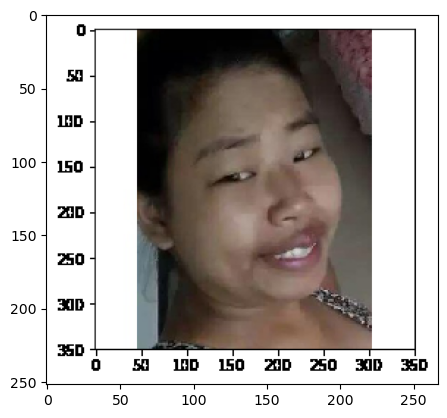

In [86]:
IND = np.argmin(train_ys)
plt.imshow(train_images[IND]/255.0)
print(train_ys[IND])
plt.show()

In [89]:
test_images, test_ys = zip(*test_data)
test_images = list(test_images)
test_ys = list(test_ys)

3


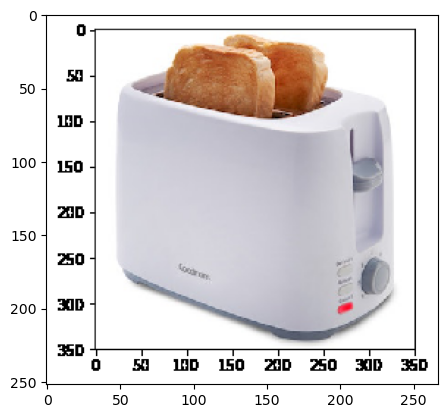

In [90]:
IND = np.argmax(test_ys)
plt.imshow(test_images[IND]/255.0)
print(test_ys[IND])
plt.show()

In [92]:
train_X = np.array(train_images)
print(train_X.shape)

(4, 252, 267, 3)


In [93]:
train_Y = np.array(train_ys)
print(train_Y.shape)

(4,)


In [95]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(train_Y.reshape(-1, 1))
train_Y = scaler.transform(train_Y.reshape(-1, 1))
test_X = np.array(test_images)
print(test_X.shape)

(1, 252, 267, 3)


In [97]:
test_Y = np.array(test_ys)
print(test_Y.shape)

(1,)


In [98]:
test_Y = scaler.transform(test_Y.reshape(-1, 1))
print(train_Y.shape)
print(test_Y.shape)

(4, 1)
(1, 1)
